# Описание цели исследования
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Подготовка и изучение данных

#### Подключим требуемые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Загрузим данные

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

Посмотрим на первые 10 строк, чтобы ознакомиться с данными, а также выведем общую информацию.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Заменим названия столбцов (приведем к нижнему регистру) str.lower()

In [5]:
data.columns=data.columns.str.lower()

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработаем пропуски при необходимости

По выведенной выше информации о датасете можем заметить, что пропуски присутствуют в следующих столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating.

Рассмотрим первым столбец **name**. Выведем только те строки, название игр в которых пропущено.

In [7]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких игр всего лишь 2 штуки. Можно предположить, что эти две игра есть описание одной игры, так как некоторые пропуски одной строки покрываются данными из другой строки, но данная идея может быть неверной, поэтому оставим ее. Попробуем вывести игры одного года создания.

In [8]:
data.query('name.isna() and year_of_release == 1993.0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Получили те же две строки. Более верным решение видется удалить данные две строки, так как все же название игры это важный ее фактор.

In [9]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Рассмотрим столбец **year_of_release**.

In [10]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Нельзя предположить логическую замену к столбцу "год выпуска" игры, поэтому удалим их. Возможно, эти данные были пропущены или утерены при переносе или объединении таблиц.

In [11]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Рассмотрим столбец **Genre**.


In [12]:
data.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Данных нет, так как пропуски были удалены при удалении строк с пропущенным именем.

Рассмотрим столбец **Critic_Score**.

In [13]:
data.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Пропуски в оценки критиками может быть возникнуты из-за человеческого или технического фактора. Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных. Неправильный запрос, объединение таблиц также может быть причиной. Возможно, что данная игра просто не была оценена критиками.

Посмотрим, какое соотношение пропусков ко всем данным, и исходя из этого ответа примем решение заполнить пропуски или удалить их.

In [15]:
data.query('critic_score.isna()')['name'].count() / data['name'].count()

0.5145341765993675

Половина всех данных - это большая часть, замена на медианное значение сильно искозит распредление, оставим их.

Рассмотрим столбец **user_score**.

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
data.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заметим, что в столбце присутствует значение tbd - аббревиатура от английского To Be Determined (будет определено), что означает, что рейтинг еще не был рассчитан. Логично будет заменить это значение на NaN, так как это будет означать тоже самое - отсутствие значения.

In [18]:
data.loc[data['user_score'] =='tbd', 'user_score'] = np.nan

In [19]:
data.query('user_score.isna()')['name'].count() / data['name'].count()

0.5461566528825104

Получился случай, аналогичный со столбцом critic_score. Если мы заменим все пропуски медианным или средним значением, то это значение будет описывать больше половины всей выборки, что неверно. Мы не можем дать альтернативную замену этим пропускам, поэтому лучше оставить их

Рассмотрим столбец **rating**.

In [20]:
data.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропуски могут быть заменены значением RP - категория ещё не присвоена, так как отсутвие значения как раз это и подразумевает.

In [22]:
data['rating'] = data['rating'].fillna('RP')

Также в списке присутвует значение K-A, что по факту просто является первоначальным названием рейтинга E. Поэтому обновим значения K-A на актуальный ее аналог.

In [23]:
data.loc[data['rating']=='K-A', 'rating'] = 'E'

#### Преобразуем данные в нужные типы. 

Для начала выясним, какие типы данных имеются:


In [24]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

- столбец User_Score содержит оценку пользователей, но так как ранее там присутствовало значение tbd, то тип был str. После замены данного значения изменим тип столбца на float.
- Мы могли бы заменить значения столбцов year_of_release и critic_score на int, чтобы сэкономить память, но учитывая, что в данных присутсвуют пропуски None, которые было решено не убирать, то оставим эти столбцы без изменений.

In [25]:
data['user_score']=data['user_score'].astype('float64')

#### Проверим данные на наличие явных и неявных дубликатов 

In [26]:
data.duplicated().value_counts()

False    16444
dtype: int64

Явных дубликатов нет. Посмотрим какие названия игр присутсвуют.

In [27]:
list(data['name'].unique())

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

В качестве неявных дубликтов также ничего не бросается в глаза.

#### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [28]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


# Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы.

<AxesSubplot:title={'center':'Количество игр по годам'}, xlabel='year_of_release', ylabel='name'>

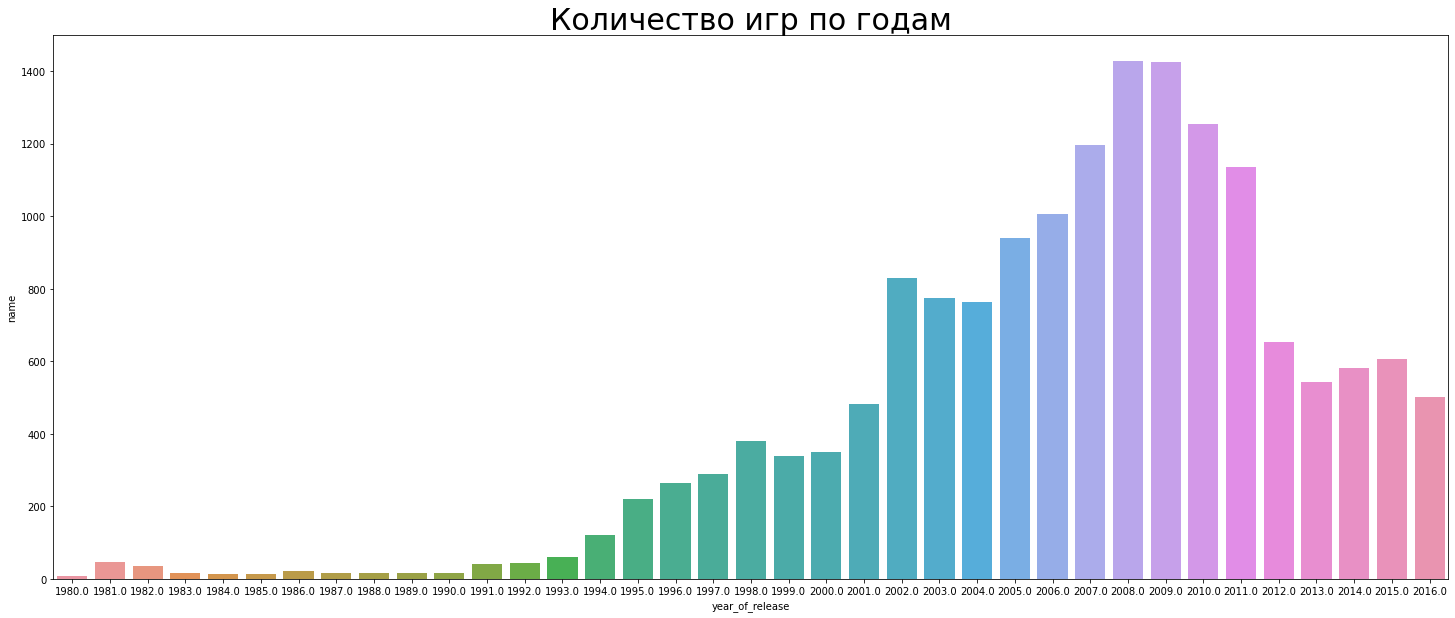

In [30]:
buf = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.rcParams['figure.figsize']=(25,10)
plt.title('Количество игр по годам', fontsize=30)
buf['year_of_release'] = buf.index
sns.barplot(x='year_of_release', y='name', ci=None, data=buf)

<!-- По полученным данным видно, что начиная с 2000 года, количество игр росло, но для более наглядной картинки разобьем года на периоды по 4 года. -->
По полученному графику можно отметить, что с 1990 был замечен явный рост выходов новых игр. 2009 год оказался последним пиковым далее количество выпускаемых игр стало снижаться.

Можно также сказать, что для прогноза продаж на 2017 год нас не особо интересуют результаты за года ранее 2000, так как в то время количество выпускаемых игр очень невелико, что не соотвествует современной картине.

#### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам.

Построим сводную таблицу, чтобы получить топ платформ по продажам. Возьмем срез 7 платформ, чтобы построить распредление по ним.

In [31]:
display(data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).head(7))
top_platform = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)[:7].index
top_platform

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14


Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4'], dtype='object', name='platform')

<AxesSubplot:title={'center':'Суммарные продажи прибыльных платформ по годам'}, xlabel='year_of_release', ylabel='all_sales'>

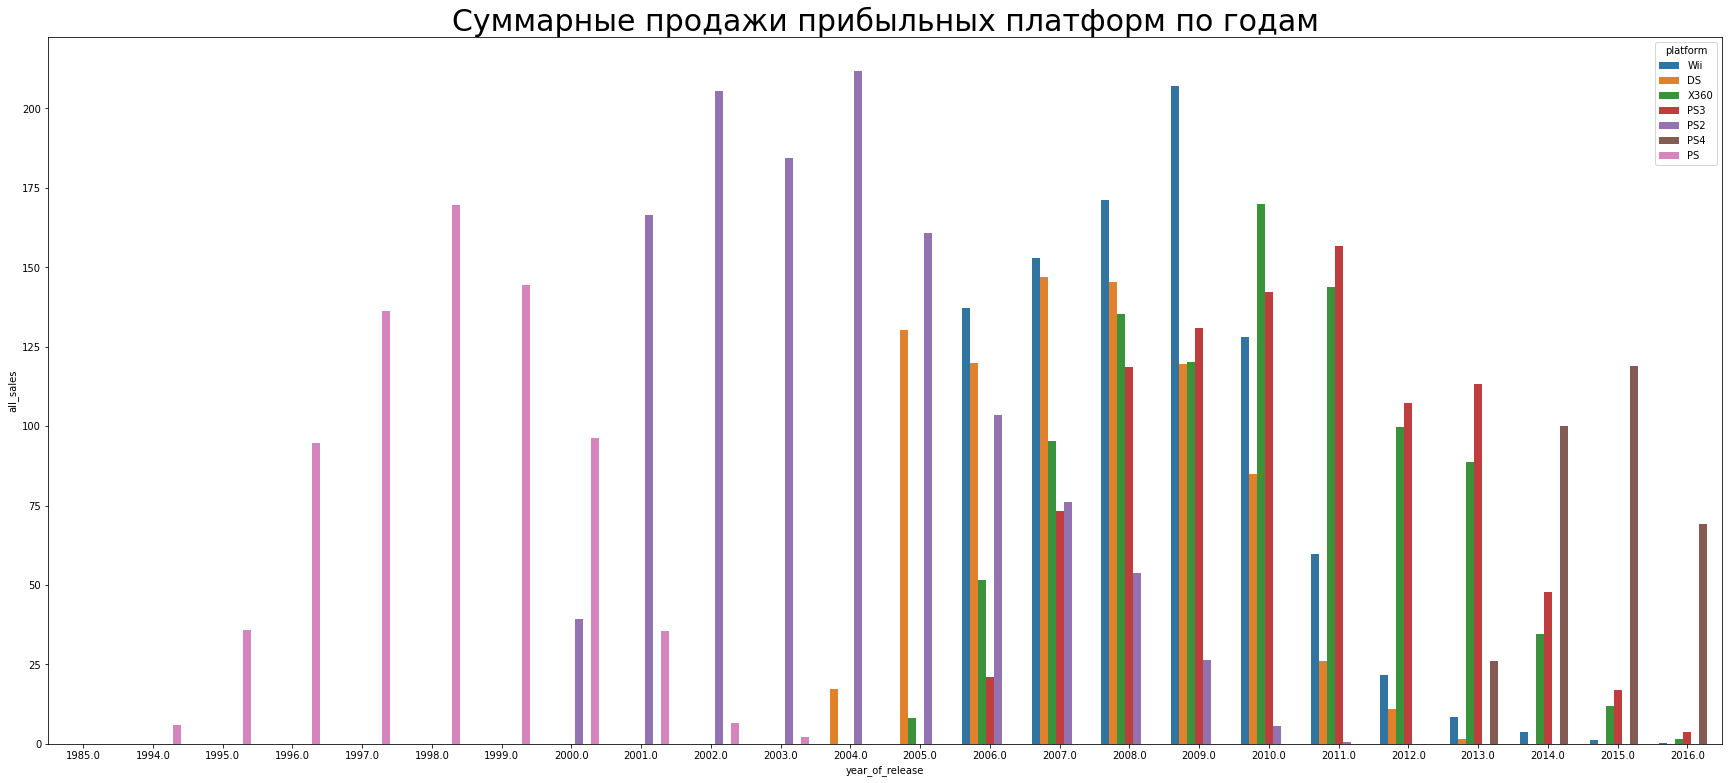

In [32]:
plt.rcParams['figure.figsize']=(30,13)
plt.title('Суммарные продажи прибыльных платформ по годам', fontsize=30)
sns.barplot(x='year_of_release', y='all_sales',estimator=sum, hue='platform', ci=None, data=data.loc[data['platform'].isin(top_platform)])

*За какой характерный срок появляются новые и исчезают старые платформы?*

По графику "суммарные продажи платформ по годам" можно заметить, что платформы существуют примерно 6-10 лет. По данной выборке можно сказать, что начиная с 2000 годов и особенно с 2005 года новые платформы стали активно появляться.

Мы выяснили, что в среднем платформы живут около 10 лет, значит для прогноза продаж за 2017 году нам подойдет период с 2012 года, который мы будем считать актулаьным. Оценим какие платформы лидируют по продажам, растут и падают? Выберим несколько потенциально продаваемых платформ.

In [33]:

actual_data = data.query('year_of_release >= 2012')
profitable_companies = actual_data['platform'].unique()
profitable_companies

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

<AxesSubplot:title={'center':'Суммарные продажи актуальных платформ по годам'}, xlabel='year_of_release', ylabel='all_sales'>

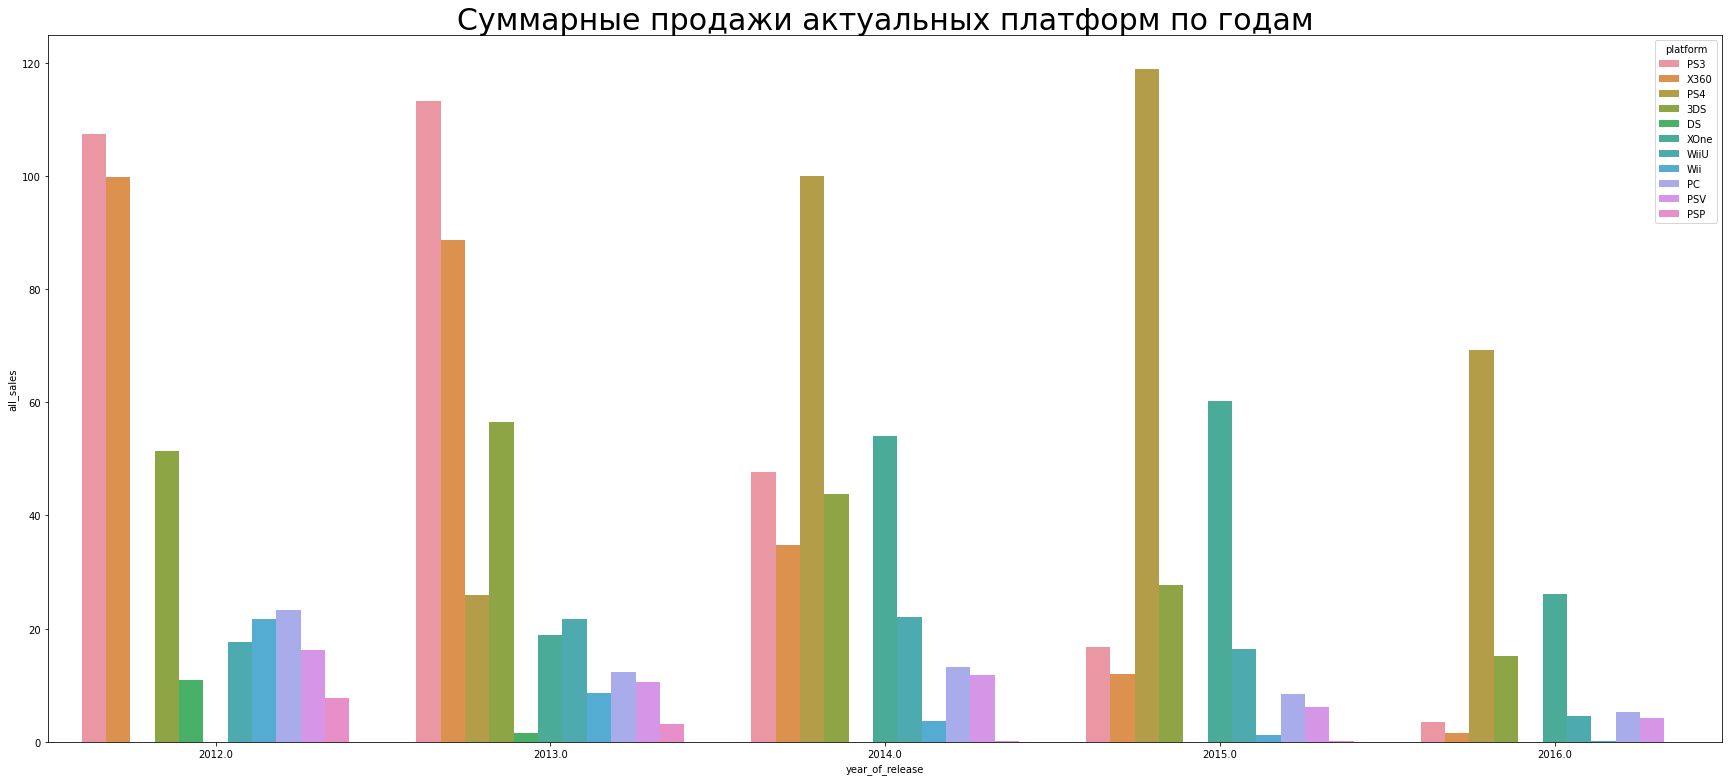

In [34]:
plt.rcParams['figure.figsize']=(30,13)
plt.title('Суммарные продажи актуальных платформ по годам', fontsize=30)
sns.barplot(x='year_of_release', y='all_sales',estimator=sum, hue='platform', ci=None, data=actual_data)

В качестве лидеров продаж за все время среди платформ, которые еще остаются на рынке в 2017 году, явно выбиваются x360 и ps3, но к 2016 году, к сожалению, количество продаж резко снижается. Зато такие платформы как: ps4 и xOne явно покажут высокие результаты в 2017 году, потому что в среднем продажи компаний за какое-то время стремятся к нормальному распредлению (также берем в учет, что данные за 2016 год могут быть представлены не в полном объеме, поэтому графически столбец за 2016 низок).

**Итого:** Так явный подъем по продажам наблюдается у компаний PS4 (лидирующая по продажам), XOne. Игры для PC, как видно по истории продаж, всегда будут продаваемыми, так как PС являются одним из основных платформ для игр. Самый резкий спад показывают платформы PS3 и X360, что закономерно выходу новых линеек данной платформы.

Потециально прибыльными платформами будем считать: PS4, XOne, 3DS, а также PC, так как он является постоянным "игроком" на рынке.

*Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.*

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

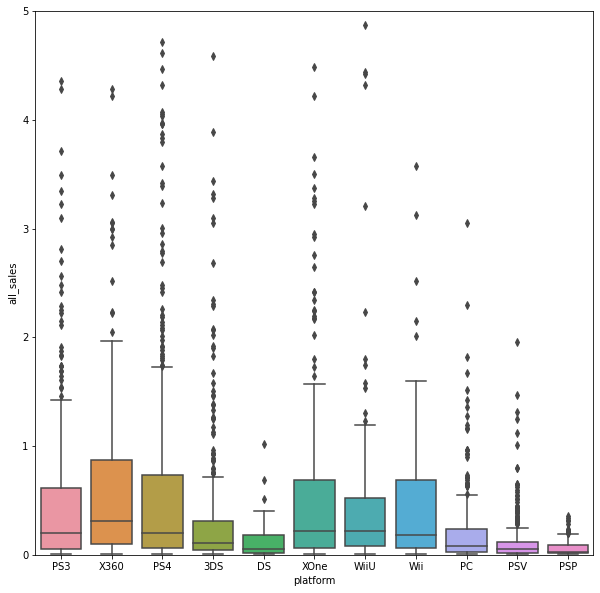

In [35]:
plt.rcParams['figure.figsize']=(10,10)
plt.ylim(0, 5)
sns.boxplot(data = actual_data, y='all_sales', x='platform')

Построим также график в исходном масштабе.

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

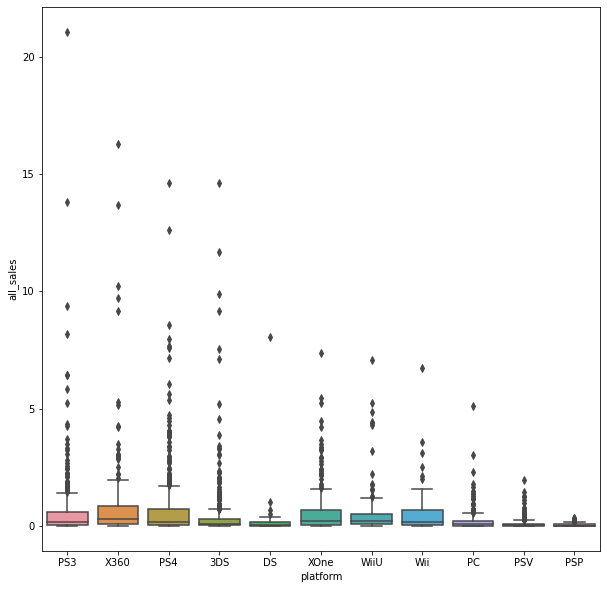

In [36]:
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(data = actual_data, y='all_sales', x='platform')

График в исходном масштабе иллюстрирует, что у первых 4 платформ присутсвуют экстримальные единичные выбросы.

По полученным данным видно, что у каждой компании присутсвуют выбросы. Также в среднем медианные значения платформ очень близки друг к другу. Платформы можно объединить по схожести распределений: первая (x360, ps3, ps4 и xOne, чуть менее к ним также WiiU) и вторая (PC, PSV, чуть менее близкая 3DS). Исходя из этого, можно предположить дальнейшие возможные продажи у схожих друг с другом компаний. Так, прогнозировать продажи для выбранных выше потенциально прибыльных платформ можно по распределению других платформ (с которыми объединили в одну группу). Например, продажи PS4 по продажам X360 и PS3. 

Интересно заметить, что также распределение XOne и PS4 очень схожи друг к другу.

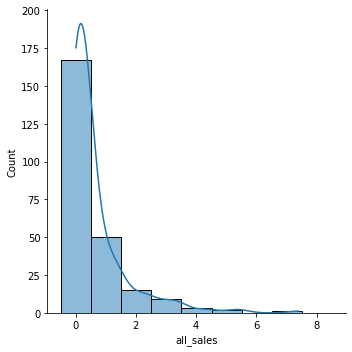

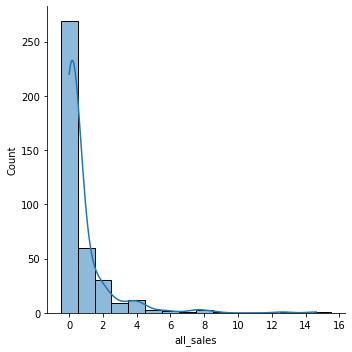

In [37]:
sns.displot(actual_data.query('platform == "XOne"')['all_sales'], discrete = True, kde = True)
plt.show()
sns.displot(actual_data.query('platform == "PS4"')['all_sales'], discrete = True, kde = True)

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для примера возьмем платформу PS3.**

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

[]

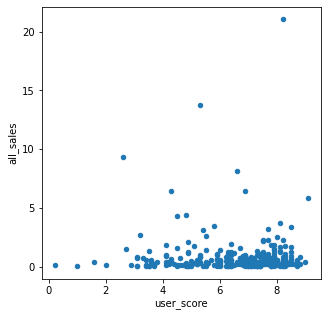

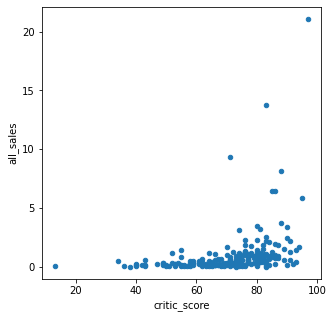

In [38]:
plt.rcParams['figure.figsize']=(5,5)
actual_data.query('platform == "PS3"')[['user_score', 'all_sales']].plot(x='user_score', y='all_sales', kind='scatter')
plt.plot()
actual_data.query('platform == "PS3"')[['critic_score', 'all_sales']].plot(x='critic_score', y='all_sales', kind='scatter')
plt.plot()

При изучении диаграмм рассеяния можно сделать вывод, что между отзывами пользователей и продажами нет прямой зависимости.Более лаконичная картина с диаграммой рассеяния по оценки критиков. Там явнее видно, что при оценки больше 80 значения становятся более разбросанные и появляется увеличение продаж. Стоит также подметить, что пользователи, что критики в очень редких случаях ставят самую высокую оценку.

Для оценки численного значения корреляции используем оценку Пирсона.

In [39]:
print('Корреляция между отзывами критиков и продажами:',actual_data.query('platform == "PS3"')['critic_score'].corr(actual_data.query('platform == "PS3"')['all_sales']))
print('Корреляция между отзывами пользователей и продажами:',actual_data.query('platform == "PS3"')['user_score'].corr(actual_data.query('platform == "PS3"')['all_sales']))

Корреляция между отзывами критиков и продажами: 0.3314972592629587
Корреляция между отзывами пользователей и продажами: -0.005143522887113828


Как и было замечено по диаграмме, отзывы и продажи коррелируют несильно между собой. Также подтвердилось, что оценка критиков влияет на продажи сильнее оценки пользователей. Оценка пользователя совсем не влияет на продажи.

Посмотрим соответсвуют ли наши выводы другим платформам. Для сравнения возьмем платформу PC и X360.

Корреляция между отзывами критиков и продажами: 0.23724324311567915
Корреляция между отзывами пользователей и продажами: -0.12186747630735577


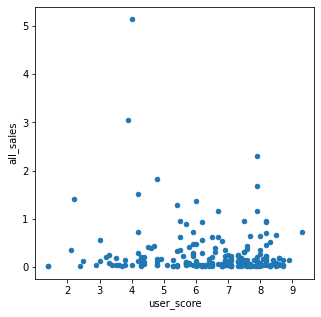

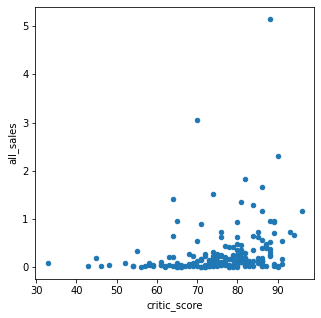

In [40]:
plt.rcParams['figure.figsize']=(5,5)
actual_data.query('platform == "PC"')[['user_score', 'all_sales']].plot(x='user_score', y='all_sales', kind='scatter')
plt.plot()
actual_data.query('platform == "PC"')[['critic_score', 'all_sales']].plot(x='critic_score', y='all_sales', kind='scatter')
plt.plot()
print('Корреляция между отзывами критиков и продажами:',actual_data.query('platform == "PC"')['critic_score'].corr(actual_data.query('platform == "PC"')['all_sales']))
print('Корреляция между отзывами пользователей и продажами:',actual_data.query('platform == "PC"')['user_score'].corr(actual_data.query('platform == "PC"')['all_sales']))

Корреляция между отзывами критиков и продажами: 0.3605734888507336
Корреляция между отзывами пользователей и продажами: 0.006163978646213326


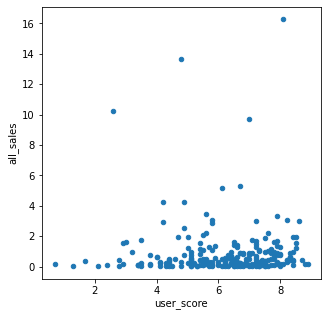

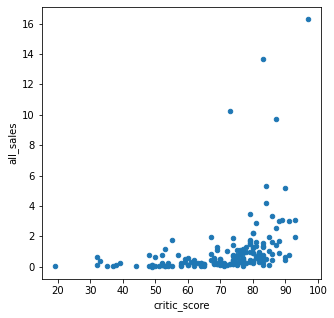

In [41]:
plt.rcParams['figure.figsize']=(5,5)
actual_data.query('platform == "X360"')[['user_score', 'all_sales']].plot(x='user_score', y='all_sales', kind='scatter')
plt.plot()
actual_data.query('platform == "X360"')[['critic_score', 'all_sales']].plot(x='critic_score', y='all_sales', kind='scatter')
plt.plot()
print('Корреляция между отзывами критиков и продажами:',actual_data.query('platform == "X360"')['critic_score'].corr(actual_data.query('platform == "X360"')['all_sales']))
print('Корреляция между отзывами пользователей и продажами:',actual_data.query('platform == "X360"')['user_score'].corr(actual_data.query('platform == "X360"')['all_sales']))

Наш вывод был верный, оценка критиков влияет на продаже в большей степени чем оценка пользователей.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Для начала построим топ жанров по прибыльности.

In [42]:
genre_top=actual_data.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)
genre_top

,all_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


<AxesSubplot:title={'center':'Медианное значение продаж по платформам'}, xlabel='genre', ylabel='all_sales'>

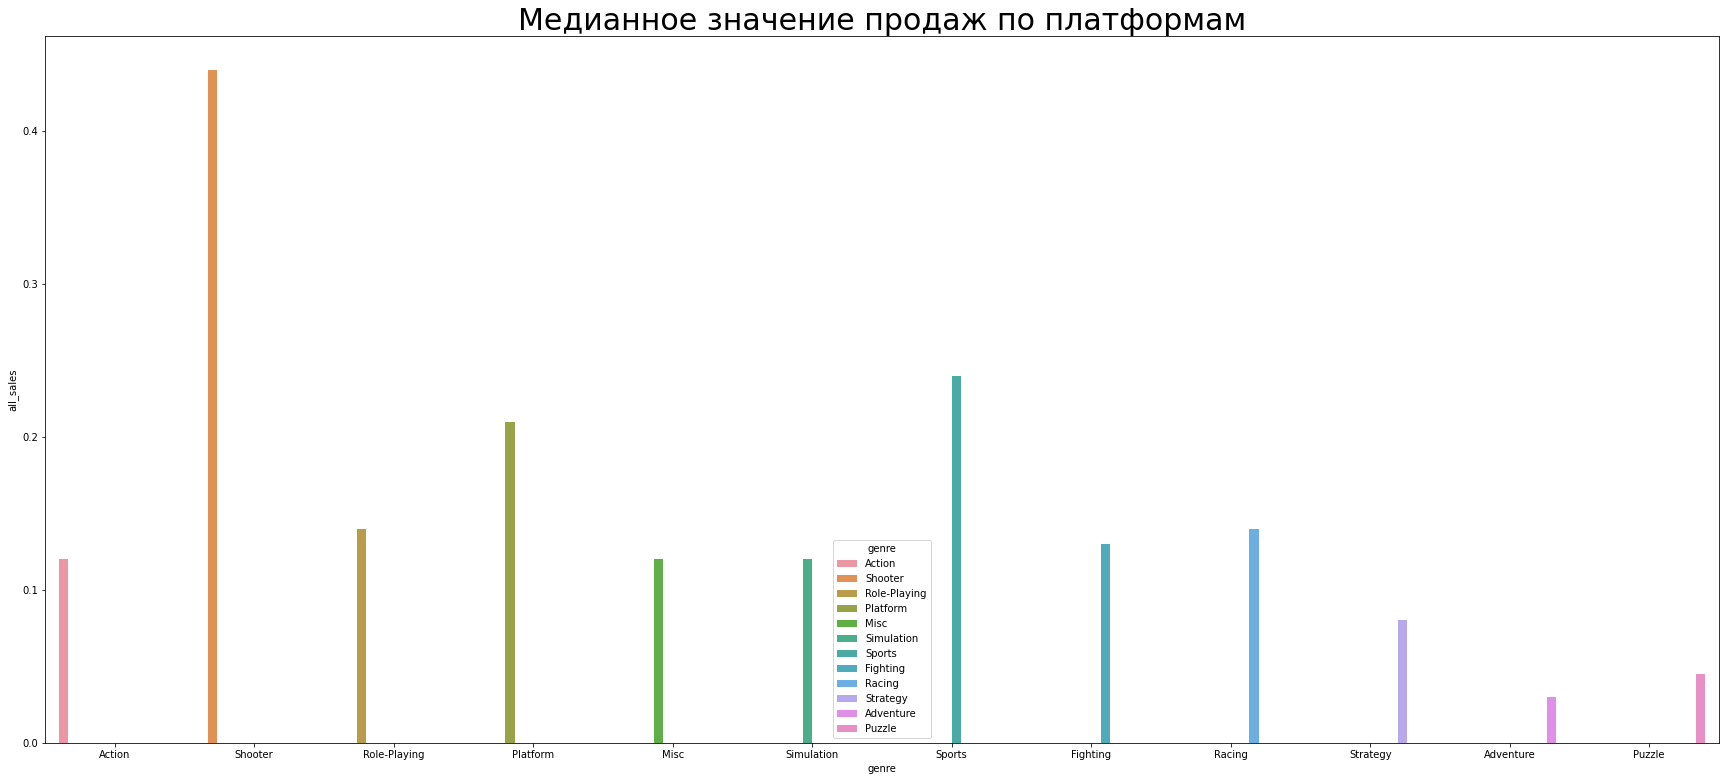

In [43]:
plt.rcParams['figure.figsize']=(30,13)
plt.title('Медианное значение продаж по платформам', fontsize=30)
sns.barplot(x='genre', y='all_sales', hue='genre', ci=None, data=actual_data, estimator = np.median)

По полученныму результату выделим следующие самые популярные жанры: shooter, sports, platform. Менее актульными оказались adventure и puzzle.

#### Портрет пользователя каждого региона

+ **Северная Америка**

*Самые популярные платформы (топ-5).*

In [44]:
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


Самая популярная платформы в Северной Америке за актуальный период - X360, но ненамного от нее отстает PS4, разница в продажах составляет примерно 30 миллионов проданных копий. Далее разница между PS3 и XOne небольшая, примерно в 10 миллионах прод. копий. В самой нижней позиции рейтинга находится 3DS с разницей с предпоследней строчкой в 40 миллионах прод. копий.

*Самые популярные жанры (топ-5).*

In [45]:
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


Топ-5 жанров почти полностью соотвествует топу жанров по всем странам, единственная разница в том, что Role-Playing и Sport поменяли свои позиции друг с другом.

*Влияет ли рейтинг ESRB на продажи?*

<AxesSubplot:title={'center':'Продажи в зависимости от возрастного рейтинга'}, xlabel='rating', ylabel='na_sales'>

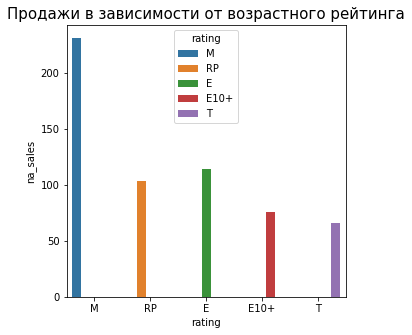

In [46]:
plt.rcParams['figure.figsize']=(5,5)
plt.title('Продажи в зависимости от возрастного рейтинга', fontsize=15)
sns.barplot(x='rating', y='na_sales', estimator=sum, hue='rating', ci=None, data=actual_data)

Самые продаваемые игры в Северой Америке имеют рейтинг M (для взрослых, 17+), связано это скорее всего с тем, что игры давно перестали быть развлечением только для детей. Рейтинг E дает возможность охватить большее количество людей, поэтому он занимает вторую строчку. E10+ подразумевает более подходящий контент для юного пользователя, но не отменяет интересного контента также для взрослых, поэтому данный рейтинг занимает следующую строку вместе с рейтингом T. Также присутсвуют немаленькое количество игр, рейтинг которым еще не был выдан.

+ **Европа**

*Самые популярные платформы (топ-5).*

In [47]:
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


В Европе топ платформ расположился в немного ином порядке. Можно заметить, что в Европе лидируют платформы компанни PlayStation. Новая версия находится в порядке 30 мил. прод. копий выше своего предшественника. А в случае платформ от microsoft старая версия опережает новую на 20 мил. прод. копий.

*Самые популярные жанры (топ-5).*

In [48]:
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


В сравнении с Америкой топ-4 жанров полностью идентичен. На 5 место расположился жанр Racing.

*Влияет ли рейтинг ESRB на продажи?*

<AxesSubplot:title={'center':'Продажи в зависимости от возрастного рейтинга'}, xlabel='rating', ylabel='eu_sales'>

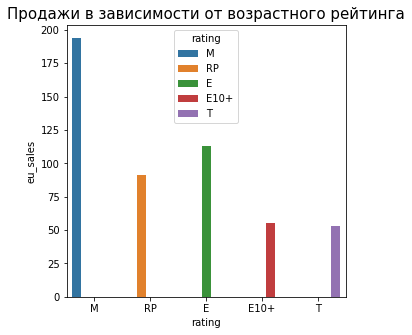

In [49]:
plt.rcParams['figure.figsize']=(5,5)
plt.title('Продажи в зависимости от возрастного рейтинга', fontsize=15)
sns.barplot(x='rating', y='eu_sales', estimator=sum, hue='rating', ci=None, data=actual_data)

Как и в Америке, лидирующее большинство игр имеют рейтинг M. И в целом весь топ соотвествует выводу по Северной Америки.

+ **Япония**

*Самые популярные платформы (топ-5).*


In [50]:
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


Как обычно и происходит, Азиатский рынок отличается в своих интересах. Так, за актуальный период время в Японии самой популярной платформой является 3DS и отрывается от других платформ на 50 миллионов проданных копий. Три платформы от PlayStation занимают следующие позиции и их продажи очень близки, разница рассчитывается в тысячах проданных копий.

*Самые популярные жанры (топ-5).*

In [51]:
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


Если в Американском и Европейском рынком жанр Role-Playing занимает 4 место, то в Японии он занимает первое. Также в топе появляются ранее не встречающийся жанры такие как fighting и simulation.

*Влияет ли рейтинг ESRB на продажи?*

<AxesSubplot:title={'center':'Продажи в зависимости от возрастного рейтинга'}, xlabel='rating', ylabel='jp_sales'>

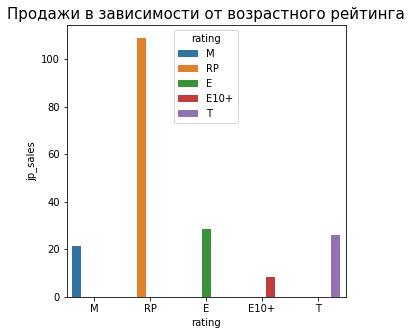

In [52]:
plt.rcParams['figure.figsize']=(5,5)
plt.title('Продажи в зависимости от возрастного рейтинга', fontsize=15)
sns.barplot(x='rating', y='jp_sales', estimator=sum, hue='rating', ci=None, data=actual_data)

В Японии слишком велико количество игр, рейтинг которым еще не был назначен. Рейтинг E и T находятся примерно на одном расположении и превышают игр с рейтингом для взрослых.

#### Проведем сравнительный анализ по регионам.

*Самые популярные платформы (топ-5).*

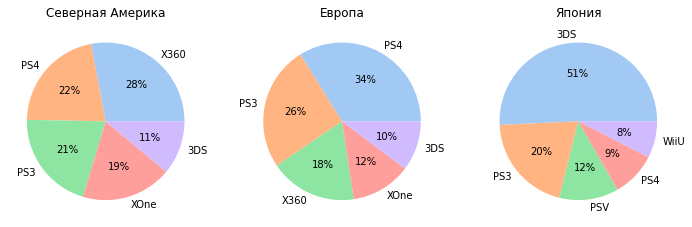

In [53]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,figsize=(12, 6))
buf_na = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()
ax0.set_title('Северная Америка')
ax0.pie(buf_na['na_sales'], labels = buf_na.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
buf_eu = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()
ax1.set_title('Европа')
ax1.pie(buf_eu['eu_sales'], labels = buf_eu.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
buf_jp = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()
ax2.set_title('Япония')
ax2.pie(buf_jp['jp_sales'], labels = buf_jp.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
plt.show()

Каждый регион имеет разную лидирующую платформу, Европа и Америка схожи между собой, у них лишь меняются местами их топ-3. В Японии лидирует платформа местного происхождения, но в топе также присутствуют платформы PlayStation как и в Европе с Америкой.

*Самые популярные жанры (топ-5)*

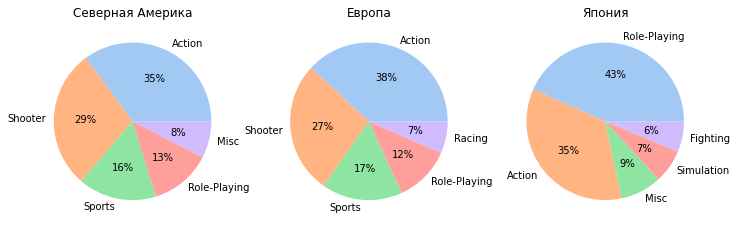

In [54]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,figsize=(12, 6))
buf_na = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()
ax0.set_title('Северная Америка')
ax0.pie(buf_na['na_sales'], labels = buf_na.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
buf_eu = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()
ax1.set_title('Европа')
ax1.pie(buf_eu['eu_sales'], labels = buf_eu.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
ax2.set_title('Япония')
buf_jp = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()
ax2.pie(buf_jp['jp_sales'], labels = buf_jp.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
plt.show()

Америка и Европа вновь очень близки между собой, у них даже с разницей в пару процентов совпадают доли, только отличаются жанры на 5 месте. У Японии процент продаж платформ жанры action совпадает с процентом в Америке и с разнице в 2% с Европой. Но лидирущую позицию занимает менее популярный чем в западных странах role-playing.

*Влияет ли рейтинг ESRB на продажи?*

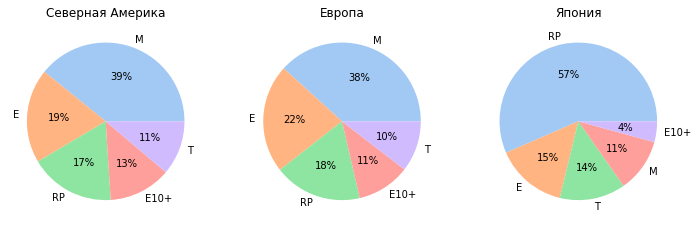

In [55]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,figsize=(12, 6))
buf_na = actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()
ax0.set_title('Северная Америка')
ax0.pie(buf_na['na_sales'], labels = buf_na.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
buf_eu = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()
ax1.set_title('Европа')
ax1.pie(buf_eu['eu_sales'], labels = buf_eu.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
buf_jp = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()
ax2.set_title('Япония')
ax2.pie(buf_jp['jp_sales'], labels = buf_jp.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
plt.show()

В Японии чаще продаются игры с рейтингом T чем с рейтингом M в сравнении с Европой и Америкой. Также там превалируют продажи игр, рейтинг которых еще не был обозначен, что подтверждает разницу между рынком Азии и остальными.

#### Проверка гипотез


**Проверим:**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action и Sports разные.

*Далее спр - средний пользовательский рейтинг*


Для проверки первой гипотезы сформулируем нулевую и альтерантивную гипотезу:

H0 = "спр XboxOne == спр PС"

H1 = "спр XboxOne != спр PС"

Генеральные совокупности не зависят друг от друга. Также чтобы построить t-тест нужно избавить от пропусков, тогда размеры выборок будут сильно отличаться, поэтому параметр equal_var сделаем равным False.

In [56]:
from scipy import stats as st


alpha = .01
results = st.ttest_ind(
    actual_data.loc[(actual_data['platform'] == 'XOne') & (actual_data['user_score'].notna())]['user_score'], 
    actual_data.loc[(actual_data['platform'] == 'PC') & (actual_data['user_score'].notna())]['user_score'], equal_var=False)

print('p-значение:', '{:.10f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965
Не получилось отвергнуть нулевую гипотезу


Снизу подтверждение, что размер выборок будет различный.

In [57]:
actual_data.loc[(actual_data['platform'] == 'XOne') & (actual_data['user_score'].notna())]['user_score'].reset_index(drop=True).index.max()

181

In [58]:
actual_data.loc[(actual_data['platform'] == 'PC') & (actual_data['user_score'].notna())]['user_score'].reset_index(drop=True).index.max()

205

Получается, что средний пользовательских рейтинг платформ Xbox One и PC одинаковый. Это может являться причинной того, что чаще всего игры, которые выходят на одной платформе через какое-то время или сразу выходят на другой.

Для проверки второй гипотезы сформулируем нулевую и альтерантивную гипотезу:

H0 = "спр жанров Action != спр Sports"

H1 = "спр жанров Action == спр Sports"

Аналогично проверки первой гипотезы, нам нужно сравнить две независящие друг от друга совокупности,а также наши выборки имеют разный размер, поэтому параметр equal_var переведем в False. 

In [59]:
from scipy import stats as st

alpha = .01
results = st.ttest_ind(
    actual_data.loc[(actual_data['genre'] == 'Action') & (actual_data['user_score'].notna())]['user_score'], 
    actual_data.loc[(actual_data['genre'] == 'Sports') & (actual_data['user_score'].notna())]['user_score'], equal_var=False)

print('p-значение:', '{:.21f}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

p-значение: 0.000000000000000000042
Не получилось отвергнуть нулевую гипотезу


In [60]:
actual_data.loc[(actual_data['genre'] == 'Action')]['user_score'].reset_index(drop=True).index.max()

1030

In [61]:
actual_data.loc[(actual_data['genre'] == 'Sports')]['user_score'].reset_index(drop=True).index.max()

267

Получается, что мы не можем отвергать, что средние пользовательские рейтинги жанров Action и Sports разные. В это есть верное зерно, ведь жанр Action в большинстве случаев имеет возрастной рейтинг из-за наличия шутеров и др., а Sports обычно подходит для любых возрастных категорий.

#### Вывод

Допустим, если бы мы хотели сделать прогнозы на 2017 год, то по проведенному исследованию можно было сделать следующие выводы:

При исслдеовании было выявлено, что в среднем любая платформа живет около 10 лет. Для прогнозировнаия 2017 года был выявлен актуальный период, который начинатся с 2012 года, так как за 3-4 года платформы полностью теряет свою популярность. Итого, самыми прибыльными платформами в 2017 году будут являться (в большей степени) PS4 и XBoxOne. Их продаже покажут рост по сравнению с 2015 и 2016 годами. Также на продажу той или иной игры лучше опираться на отзывы критиков, чем пользователей, но и то их степень взаимосвязи несильно высока. Самыми прибыльными жанрами за актульный период будут являться shooter, sports, platform, а ставки на adventure и puzzle лучше не ставить. В Северной Америке все еще сохраняет популярность игры на платформу Xbox360, но судя по росту PS4 и спаду Xbox360, скоро его место займет платформа от PlayStation. Action, shooter - лидирющие жанры в Север. Америке, оттого и рейтинг чаще всего встречающийся у продаваемых игр там имеет возрастное ограничение M. В Европе лидирующее большинство пользуется платформами от PlayStation, жанры совпадают с интересами Северной Америки, поэтому и возрастное ограничение тоже. Японцы отдают предпочтение платформе 3Ds, остальные места в топе аналогично Европе - платфоры от PlayStation. Любимый жанр Японцев - Role-Playing, а также у них отсутсвует какой-либо сильно превалирующий возрастной рейтинг.
